# Julia sets of quadratic polynomials

The purpose of this notebook is to explore visually some filled-in Julia sets of quadratic polynomials. 

We begin with a definition. Given $f: \mathbb{C} \rightarrow \mathbb{C}$ such that $f(z) = z^{2} + c$, where $c \in \mathbb{C}$, the filled-in Julia set of $f$, denoted by $\mathcal{K}(f)$ is defined as the set of complex numbers whose orbit remains bounded under iteration:

$$ \mathcal{K}(f) = \{ z \in \mathbb{C} : \{f^{\circ n}(z)\} \text{  is bounded  } \} $$

If, on the contrary, the orbit of $z$ is unbounded, we say that it belongs to the set $A_{f}(\infty)$, which is called the basin of attraction to infinity:

$$ A_{f}(\infty) = \{ z \in \mathbb{C} : \{f^{\circ n}(z)\} \rightarrow \infty \} $$

We have that the Julia set of $f$, denoted by $\mathcal{J}(f)$ is the common boundary of these two sets:

$$ \mathcal{J}(f) = \partial A_{f} (\infty) = \partial \mathcal{K}(f) $$

If $\text{int} ( \mathcal{K} (f) ) = \varnothing$, then $\mathcal{K}(f) = \mathcal{J}(f)$.
In some sense, the Julia set contains points whose neighborhoods, no matter how small, exhibit chaotic behavior under iteration. 
The set $A_{f}(\infty)$ is open, connected and unbounded.

We now state two useful theorems:

**Theorem 1**. Consider $f(z) = z^{2} + c$ and let $z_{0}$ be an arbitrary complex number. Furthermore, let us define the radius $R$ as

$$ R = \frac{1 + \sqrt{1 + 4|c|}}{2} .$$

If, for some $n \in \mathbb{N}$ we have $|f^{\circ n}(z_{0})| > R$, then we can be sure that $ \{f^{\circ n}(z_{0})\} \rightarrow \infty $ so that $z_{0} \in A_{f}(\infty) $ and $z_{0} \notin \mathcal{J}(f)$.


We'll use this last theorem to draw some Julia sets.


### Dependencies

In [18]:
from matplotlib.pyplot import figure, axis, imshow
from numpy import linspace, empty
from math import sqrt

We define a function $\texttt{julia}$ which will give us either the number of iterations that it took for a point to escape the disk of radius $\texttt{r}$, or 

In [27]:
def julia(z0, c, maxiter, r):
    for n in range(maxiter):
        if abs(z0) > r:
            break;
        else:
            z0 = z0*z0 + c
    return n        

### The filled-in Julia set of  $z^{2} + i$

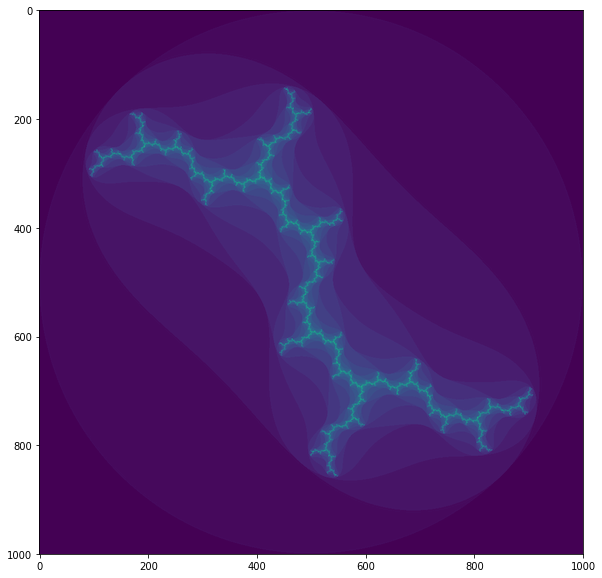

In [35]:
c = complex(0, -1)

R = (1 + sqrt(1 + 4*abs(c)))/2 # radius of the disk in which the filled-in Julia is contained

xvalues = linspace(-R, R, 1000)
yvalues = linspace(-R, R, 1000)
xlen = len(xvalues)
ylen = len(yvalues)

atlas = empty((xlen, ylen))

for ix in range(xlen):
    for iy in range(ylen):
            re = xvalues[ix]
            im = yvalues[iy]
            z = complex(re, im)
            atlas[ix, iy] = julia(z, c, 1000, R)
           
figure(figsize=(10,10))        
imshow(atlas.T, interpolation="lanczos")            

### Plotting

In [3]:
def mandelbrot(c, maxiter):
    z = complex(0, 0)
    
    for n in range(maxiter):
        z = z*z + c
        
        if abs(z) > 4:
            break
            pass
        
        pass
    
    return n

In [19]:
xvalues = linspace(-2.25, 0.75, 1000)
yvalues = linspace(-1.5, 1.5, 1000)

xlen = len(xvalues)
ylen= len(yvalues)

atlas = empty((xlen, ylen))

for ix in range(xlen):
    for iy in range(ylen):
        
        cx = xvalues[ix]
        cy = yvalues[iy]
        c = complex(cx, cy)
        
        atlas[ix, iy] = mandelbrot(c, 120)

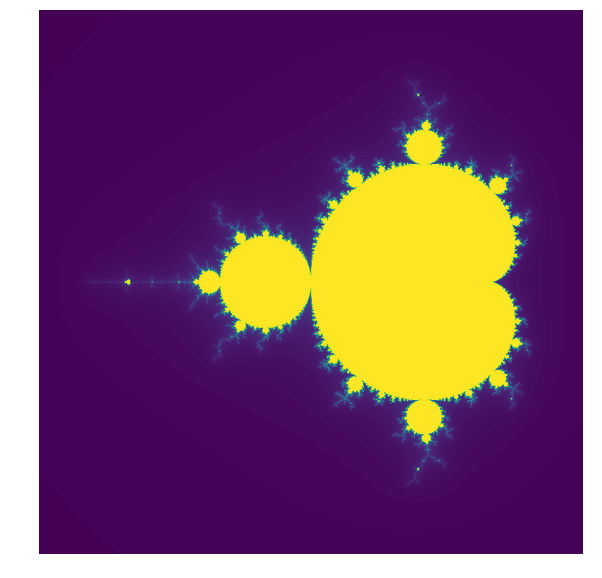

In [20]:
figure(figsize=(10,10))
axis('off')
imshow(atlas.T, interpolation="lanczos")